In [103]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats

In [104]:
#Q1

In [105]:
df = pd.read_excel('TA2.xlsx')
df.columns

Index(['Manufacturer', 'Screen Size', 'Motion Rate', 'Pixel', 'Overall Rating',
       'Video Quality', 'Sound quality', 'Appearance', 'Number of Features',
       'Ease of Set up', 'Life Span', 'Expert Overall Rating', 'size=26"',
       'size=32"', 'size=36"', 'size=40"', 'size=42"', 'size=46"', 'size=49"',
       'size=52"', 'size=55"', 'size=60"', 'motionrate=120', 'motionrate=240',
       'motionrate=600', 'Pixel=1080', 'Selling Price',
       'Yearly units sold in US'],
      dtype='object')

In [106]:
df['Total Revenue'] = df['Selling Price'] * df['Yearly units sold in US']

In [107]:
y = df['Total Revenue']
y_u = df['Yearly units sold in US']
x = df.drop(['Total Revenue', 'Yearly units sold in US','Motion Rate','Screen Size','Pixel','Manufacturer'],1)

In [108]:
model = LinearRegression().fit(x,y)
model_u = LinearRegression().fit(x,y_u)

In [109]:
 # get columns headers
var = x.columns.tolist()
coef = model.coef_.tolist()
coef_u = model_u.coef_.tolist()

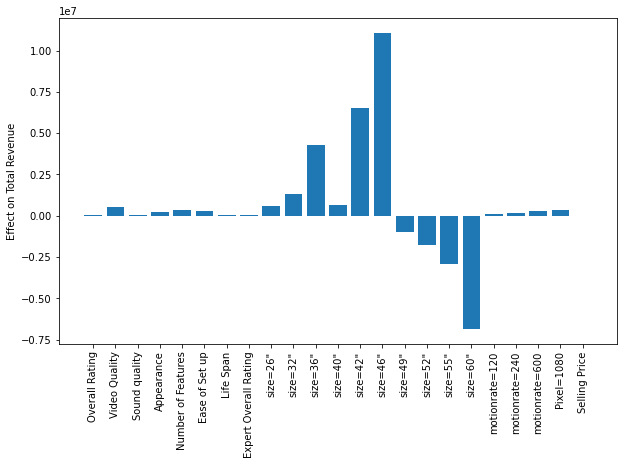

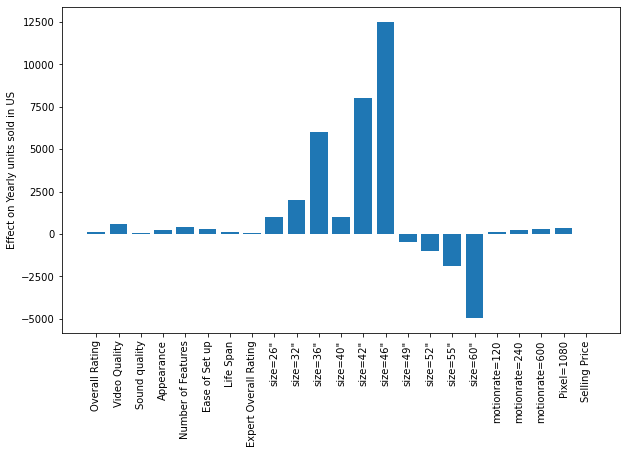

In [110]:
# Bar chart to show relative importance 
plt.figure(figsize=(10,6))
plt.bar(var,coef)
plt.ylabel('Effect on Total Revenue')
plt.xticks(rotation = 90)

plt.figure(figsize = (10,6))
plt.bar(var, coef_u)
plt.ylabel('Effect on Yearly units sold in US')
plt.xticks(rotation = 90)
plt.show()

In [111]:
# Regression results
var.insert(0, 'Intercept')
coef.insert(0, model.intercept_)
coef_u.insert(0, model_u.intercept_)
out = pd.DataFrame({'Variable': var, 'Coefficient_revenue': coef,'Coefficient_units':coef_u})
output = out.iloc[out['Coefficient_revenue'].abs().argsort()[::-1].reset_index(drop=True)]
print(output)

                 Variable  Coefficient_revenue  Coefficient_units
14               size=46"         1.107737e+07       12524.334956
18               size=60"        -6.860471e+06       -4978.424788
13               size=42"         6.544469e+06        8016.864276
0               Intercept        -5.225650e+06       10480.026174
11               size=36"         4.286507e+06        6016.602939
17               size=55"        -2.936798e+06       -1892.546678
16               size=52"        -1.767035e+06       -1029.154963
10               size=32"         1.300465e+06        2002.103259
15               size=49"        -9.913823e+05        -480.448968
12               size=40"         6.398090e+05        1012.322244
9                size=26"         5.941529e+05        1007.475260
2           Video Quality         5.627410e+05         590.426044
5      Number of Features         3.429122e+05         435.987545
22             Pixel=1080         3.276495e+05         355.964377
21        

In [48]:
#Q2

In [112]:
df.cur_pivot = pd.pivot_table(df, values = ['Video Quality', 'Sound quality', 'Appearance', 'Number of Features', 'Ease of Set up','Life Span'],
                   index = ['Manufacturer'],  margins = True)
df.pivot = pd.pivot_table(df, values = ['Video Quality', 'Sound quality', 'Appearance', 'Number of Features', 'Ease of Set up','Life Span'],
                   columns = ['Manufacturer'])

features_means = pd.DataFrame(df.cur_pivot.loc['All',:])

df.output = pd.concat([features_means,df.pivot],axis = 1)
df.output

<ipython-input-112-4ab60305e2d6>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cur_pivot = pd.pivot_table(df, values = ['Video Quality', 'Sound quality', 'Appearance', 'Number of Features', 'Ease of Set up','Life Span'],
<ipython-input-112-4ab60305e2d6>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.output = pd.concat([features_means,df.pivot],axis = 1)


,All,LG,Panasonic,Philips,Samsung,Sharp,Sony,Toshiba,Vizio
Appearance,3.729943,3.971932,3.586818,4.025114,4.220114,3.461023,3.964659,3.482841,3.127045
Ease of Set up,3.578864,3.601591,4.211136,3.209659,3.883636,3.191705,3.728977,3.403409,3.400795
Life Span,3.795199,3.100909,4.637045,3.595909,4.491136,3.382955,4.102045,3.509318,3.542273
Number of Features,3.563452,4.225341,3.814205,2.903636,4.378636,3.361136,3.236818,3.433636,3.154205
Sound quality,3.703097,4.209659,3.503295,3.889773,4.204205,3.633750,4.081591,3.110114,2.992386
Video Quality,3.619588,3.415795,4.378523,3.391364,4.131591,3.572159,3.906250,3.056818,3.104205


<ipython-input-113-6595dee8b0eb>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.coef = pd.DataFrame(coef)


<AxesSubplot:label='64cb5979-9f0a-4c42-9335-2b9a872992ba'>

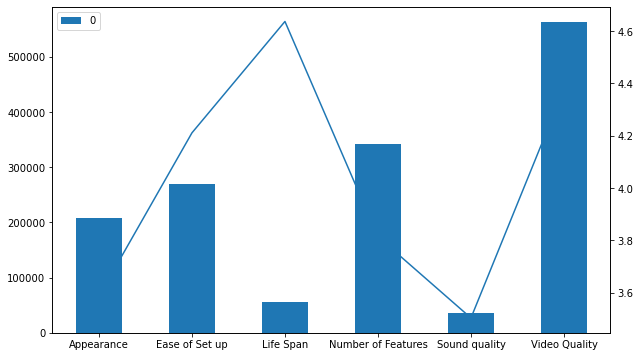

In [113]:
df.coef = pd.DataFrame(coef)
df.coef.index = var

rating = df.coef.loc[['Appearance','Ease of Set up','Life Span','Number of Features','Sound quality','Video Quality'],:]

rating.plot(kind = 'bar', figsize = (10,6))

df.output['Panasonic'].plot(secondary_y = True)

In [114]:
rating.df = pd.concat([rating,df.output['Panasonic']], axis = 1)
rating.df.columns = ['Coefficient','Panasonic Rating']
rating.df['Coeficient/Rating'] = rating.df['Coefficient']/(rating.df['Panasonic Rating']**2)
rating.df.sort_values('Coeficient/Rating', ascending = False)

<ipython-input-114-be8b9b37954a>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  rating.df = pd.concat([rating,df.output['Panasonic']], axis = 1)


,Coefficient,Panasonic Rating,Coeficient/Rating
Video Quality,562740.973674,4.378523,29353.055860
Number of Features,342912.151670,3.814205,23570.832225
Appearance,208846.441690,3.586818,16233.357576
Ease of Set up,269044.111366,4.211136,15171.372838
Sound quality,35565.698449,3.503295,2897.862739
Life Span,56213.112500,4.637045,2614.297012


In [ ]:
#Q3 bonus

In [115]:
t1=pd.pivot_table(df,index=['Screen Size', 'Motion Rate', 'Pixel'],values=['Selling Price'],aggfunc=np.mean).reset_index()

df=pd.merge(df,t1,on=['Screen Size', 'Motion Rate', 'Pixel'],how='left',suffixes=('','_avg'))

df['price_diff']=df['Selling Price']-df['Selling Price_avg']

df['total_revenue'] = df['Yearly units sold in US'] * df['Selling Price']

df[['Manufacturer', 'Screen Size', 'Motion Rate', 'Pixel','Selling Price_avg','price_diff']]

,Manufacturer,Screen Size,Motion Rate,Pixel,Selling Price_avg,price_diff
0,LG,19,60,720,438.750,-8.750
1,LG,19,60,1080,528.750,6.250
2,LG,19,120,720,490.625,4.375
3,LG,19,120,1080,546.875,-6.875
4,LG,19,240,720,553.750,-8.750
...,...,...,...,...,...,...
699,Toshiba,60,120,1080,1152.500,-82.500
700,Toshiba,60,240,720,1136.875,-76.875
701,Toshiba,60,240,1080,1215.625,-65.625
702,Toshiba,60,600,720,1209.375,-54.375


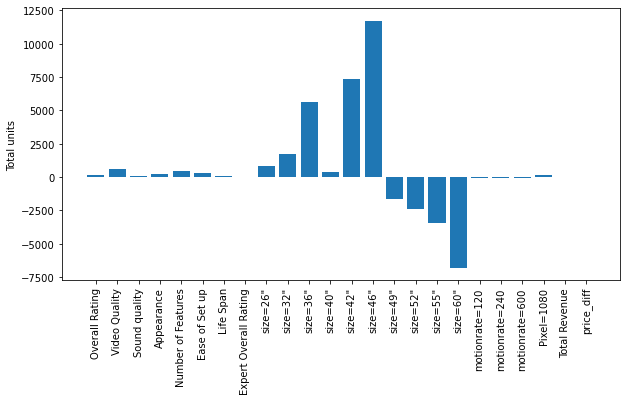

In [121]:

y = df['Yearly units sold in US']
x = df.drop(['Manufacturer', 'Screen Size', 'Motion Rate', 'Pixel', 'Selling Price', 'Yearly units sold in US','total_revenue', 'Selling Price_avg'], 1)
model = LinearRegression().fit(x, y)

var = x.columns.tolist()    
coef = model.coef_.tolist() 
plt.figure(figsize=(10, 5))
plt.bar(var, coef)
plt.ylabel('Total units')
plt.xticks(rotation='vertical')
plt.show()

In [117]:
var.insert(0, 'Intercept')
coef.insert(0, model.intercept_)
out = pd.DataFrame({'Variable': var, 'Coefficient': coef})
out

,Variable,Coefficient
0,Intercept,9182.366818
1,Overall Rating,128.488279
2,Video Quality,602.441925
3,Sound quality,56.268413
4,Appearance,218.515294
5,Number of Features,441.865948
6,Ease of Set up,317.020702
7,Life Span,117.673556
8,Expert Overall Rating,22.759294
9,"size=26""",860.984590
